In [56]:
import tensorflow as tf
import numpy as np
from random import randint
from tensorflow.examples.tutorials.mnist import input_data

### Load MNIST

In [2]:
# Loading mnist data with as one hot encoded
# Please download datasets from http://yann.lecun.com/exdb/mnist/
# Located it under MNIST_data folder of the same directory as this notebook
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Inspect data
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
# Number of examples
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

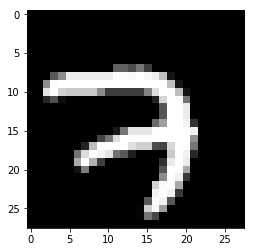

In [23]:
single_image = mnist.train.images[0].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [24]:
single_image.min()

0.0

In [25]:
single_image.max()

0.9960785

### Parameters

In [26]:
# x is just a placeholder that we want to tell TF to flatten each mnist
# image into a 784-dimensional vector
# 1. Placeholders
x = tf.placeholder(tf.float32, [None, 784])

In [27]:
# Weight is equivalent to 784 images and 10 possible labels
# We are going to learn W and b. It doesn't really matter what they
# are initially
# 2. Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [28]:
# 3. softmax model
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [34]:
# 4. loss function
# In ML, we typically define what it means for a model to be bad. We call
# this "cost" or "loss". It represents how far off our model is from our
# https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits
y_true = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [39]:
# 5. Optimizer
# Below code automatically performs backpropogation
optimizer = tf.train.GradientDescentOptimizer(0.5)
train_step = optimizer.minimize(cross_entropy)

In [41]:
# 6. Create session
init = tf.global_variables_initializer()

Checking accuracy x = mnist test images
y_ mnist test labels
0.907
NN predicted 0


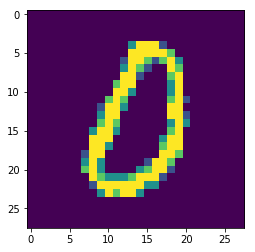

In [60]:
with tf.Session() as sess:
    sess.run(init)
    
    # Actual training
    for step in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_true: batch_ys})
    
    # Evaluating model
    # We are using softmax: getting highest y probability
    # Below basically checks which ones are matching
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    # Booleans can be casted to integers T = 1 F = 0
    # Get average of them
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # We will get 2 results
    # y could be [3, 4] when y_true (testing) can be [3, 9]
    print('Checking accuracy x = mnist test images')
    print('y_ mnist test labels')
    print(sess.run(accuracy,
                   feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))
    
    # Running some predictions
    num = randint(0, mnist.test.images.shape[0])
    img1 = mnist.test.images[num]
    prediction = sess.run(tf.arg_max(y, 1), feed_dict={x: [img1]})
    plt.imshow(img1.reshape(28, 28))
    print('NN predicted', prediction[0])